# İstanbul’da İlçelere Göre Evsel Atık Üretimi, Nüfus Yoğunluğu ve Kişi Başına Atık Analizi

## 🔍 Projenin Amacı ve Önemi

Bu proje, İstanbul’daki evsel atık üretiminin ilçelere ve yıllara göre dağılımını analiz etmeyi amaçlamaktadır. Amaç sadece toplam atık miktarını incelemek değil, aynı zamanda bu verileri **nüfus verisiyle birleştirerek kişi başına düşen atık miktarını hesaplamak** ve **zaman içindeki değişim oranlarını** ortaya koymaktır.

Bu sayede:

- Nüfusu az olmasına rağmen kişi başına düşen atığı yüksek olan ilçeler tespit edilebilir.
- Yıllar içinde kişi başı atık artışı hızla yükselen bölgeler belirlenerek **öncelikli müdahale alanları** oluşturulabilir.
- Temizlik hizmetlerinin ve kaynakların daha adil, dengeli ve verimli dağıtımı için veri temelli kararlar alınabilir.

Bu analiz, belediyelere aşağıdaki faydaları sağlar:
- Hangi ilçelerde **çevresel baskının** yoğunlaştığını göstererek önlem alma fırsatı sunar.
- Temizlik hizmetlerinin yeniden yapılandırılmasında **adalet ve verimlilik ilkelerini** destekler.
- Gelecekte yapılabilecek **rota optimizasyonu, yapay zeka destekli temizlik sistemleri, geri dönüşüm kampanyaları** gibi gelişmiş çözümler için temel sağlar.


## 1-EVSEL ATIK MİKTARI ANALİZİ

In [1]:
import pandas as pd
import requests  #Python’un internet üzerinden veri almasını sağlar.

# İBB'nin API adresine gitmesi sağlanır.
url = "https://data.ibb.gov.tr/api/3/action/datastore_search"
params = {
    "resource_id": "50036dfd-aea5-4f06-832f-f7020fdaaa5a",  # Kullanılmak istenen veri
    "limit": 1000  # En fazla 1000 satır
}

response = requests.get(url, params=params)

# Gelen verileri JSON formatında al
data = response.json()

# Verinin içinden 'records' kısmını bul, DataFrame'e çevir
df_atik = pd.DataFrame(data["result"]["records"])

Bu veri seti, İstanbul’un her ilçesinde yıllara göre oluşan evsel atık miktarlarını içermektedir.  
Veri, İBB Açık Veri Portalı'ndan API aracılığıyla çekilmiştir. 

**VERİYE BAKIŞ**

In [2]:
# Veri hakkında bilgi
df_atik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _id     39 non-null     int64  
 1   Ilce    39 non-null     object 
 2   2004    39 non-null     int64  
 3   2005    39 non-null     int64  
 4   2006    39 non-null     int64  
 5   2007    39 non-null     int64  
 6   2008    39 non-null     int64  
 7   2009    39 non-null     int64  
 8   2010    39 non-null     float64
 9   2011    39 non-null     float64
 10  2012    39 non-null     float64
 11  2013    39 non-null     int64  
 12  2014    39 non-null     int64  
 13  2015    39 non-null     float64
 14  2016    39 non-null     float64
 15  2017    39 non-null     float64
 16  2018    39 non-null     float64
 17  2019    39 non-null     int64  
 18  2020    39 non-null     float64
 19  2021    39 non-null     float64
 20  2022    39 non-null     float64
 21  2023    39 non-null     float64
 22  2024

- Veri seti toplam **39 satır** (yani İstanbul'daki 39 ilçe) ve **23 sütundan** oluşmaktadır.
- Sütunlardan ilki `_id` otomatik sıra numarasıdır ve analizde kullanılmayacaktır.
- `Ilce` sütunu ilçelerin isimlerini içerir ve **metin (object)** tipindedir.
- Diğer sütunlar yılları temsil eder ve **2004–2024 yılları** arasındaki evsel atık miktarlarını içerir.
- Yıllara ait sütunların veri tipi genellikle `int64` ve `float64` türündedir. Bu, bazı yıllarda verilerin küsuratlı (ondalıklı) olduğunu gösterir.
- **Hiçbir sütunda eksik veri (null) bulunmamaktadır.**

In [3]:
# Veri tipi konrtolü
df_atik.dtypes

_id       int64
Ilce     object
2004      int64
2005      int64
2006      int64
2007      int64
2008      int64
2009      int64
2010    float64
2011    float64
2012    float64
2013      int64
2014      int64
2015    float64
2016    float64
2017    float64
2018    float64
2019      int64
2020    float64
2021    float64
2022    float64
2023    float64
2024    float64
dtype: object

In [4]:
# "_id" sütunu veri kümesinden kaldır
df_atik = df_atik.drop(columns=["_id"])

Analiz kapsamında anlamlı bir değişken içermediği için `_id` sütunu veri setinden çıkarılmıştır.

In [5]:
# Sayısal sütunlardaki veri tipleri float formatına dönüştürülür.
for col in df_atik.columns[1:]:  # 'Ilce' hariç tüm sütunlar
    df_atik[col] = pd.to_numeric(df_atik[col], errors="coerce")

Veri tipi dönüşümü işlemiyle, yıllara karşılık gelen tüm sayısal sütunlar `float` türüne dönüştürülmüştür.  
Bu adım, matematiksel işlemlerde (toplama, ortalama, görselleştirme vb.) tutarlılık ve hata önleme açısından önemlidir.

In [6]:
# Sütun adlarındaki olası boşluk karakterleri temizle
df_atik.columns = df_atik.columns.str.strip()

In [7]:
# İlk 5 satırı göster
df_atik.head()

,Ilce,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Adalar,7834,10615,17228,12102,12232,13228,11883.58,12108.72,12077.00,...,12004.20,12710.630,12603.84,14897.920,16718,11466.05,11544.45,11004.000,11109.22,8621.37
1,Arnavutköy,14742,17055,29874,31163,30187,39603,51041.05,53779.25,59294.25,...,88764.76,88435.150,94140.90,94542.260,93010,102241.26,106291.08,101355.750,113185.25,125301.92
2,Ataşehir,99570,108725,116350,115838,108804,57172,136509.36,145205.96,153265.03,...,179389.51,183933.310,180545.78,177515.740,174355,176177.61,171078.17,167126.100,171944.24,190210.43
3,Avcılar,76741,68579,102550,113784,106832,121277,113792.65,115190.49,119613.84,...,183128.46,171638.274,164913.53,161040.231,155042,151971.13,142170.27,138204.310,147951.60,187118.29
4,Bahçelievler,165395,186014,200850,198891,193768,208109,189725.48,187097.74,190637.59,...,212793.82,217714.380,220362.09,223864.935,212956,204043.76,199120.09,246410.759,254343.91,266751.80


**GÖRSELLEŞTİRMELER**

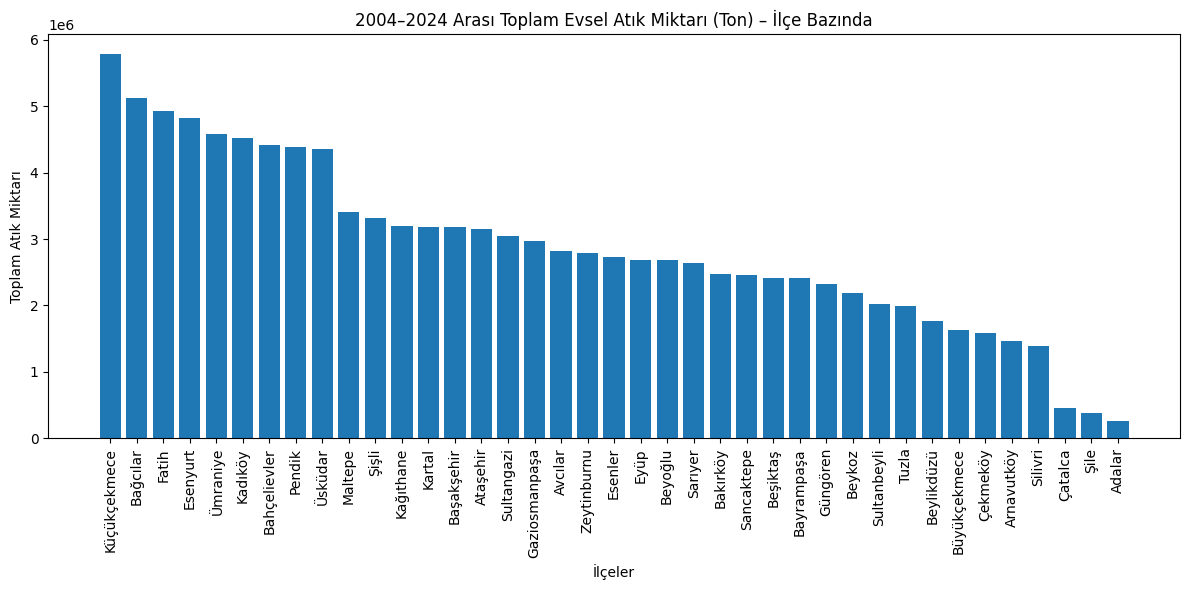

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlçelere göre toplam atık miktarını hesapla (2004–2024)
df_atik["Toplam_Atik"] = df_atik.iloc[:, 1:].sum(axis=1)

# Büyükten küçüğe sırala
df_atik_sorted = df_atik.sort_values("Toplam_Atik", ascending=False)

# Bar chart çiz
plt.figure(figsize=(12, 6))
plt.bar(df_atik_sorted["Ilce"], df_atik_sorted["Toplam_Atik"])
plt.xticks(rotation=90)
plt.title("2004–2024 Arası Toplam Evsel Atık Miktarı (Ton) – İlçe Bazında")
plt.xlabel("İlçeler")
plt.ylabel("Toplam Atık Miktarı")
plt.tight_layout()
plt.show()

### 2004–2024 Yılları Arasında Toplam Evsel Atık Miktarı – İlçe Bazında

Bu grafikte, İstanbul'daki ilçelerin 2004–2024 yılları arasında ürettiği toplam evsel atık miktarları karşılaştırılmıştır.

- **Küçükçekmece**, **Bağcılar**, **Fatih**, **Esenyurt** ve **Ümraniye** en fazla atık üreten ilçeler olarak öne çıkmaktadır.  
Bu durum, bu ilçelerin yüksek nüfus yoğunluğu, ticaret hacmi veya sanayi faaliyetleriyle ilişkilendirilebilir.

- **Adalar**, **Şile**, **Çatalca** ve **Silivri** gibi ilçeler ise en az atık üreten bölgeler arasında yer almaktadır.  
Bu ilçelerin daha az yerleşim alanına ve düşük nüfusa sahip olmaları bu sonucu açıklayabilir.

Grafikte y ekseni milyon ton (`1e6`) ölçeğinde verilmiştir.  
Bu görselleştirme, İstanbul genelindeki atık dağılımını daha net analiz edebilmek için temel bir başlangıç sunmaktadır.


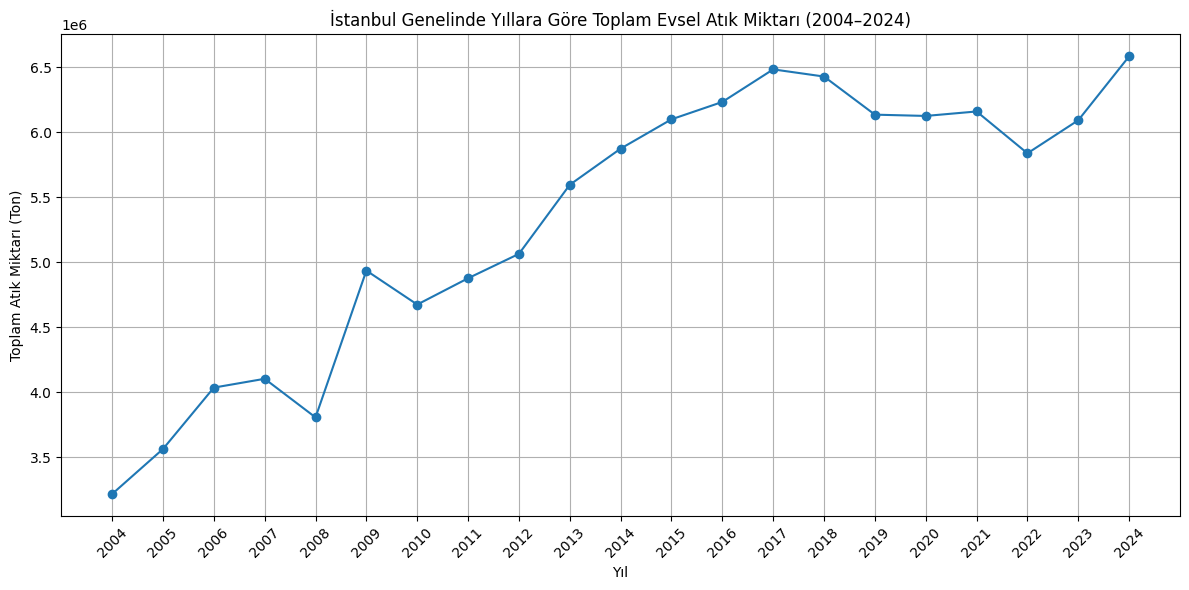

In [9]:
# Sadece yıl sütunlarını seç
year_columns = df_atik.columns[1:-1]  

# Her yıl için toplam atık miktarı
total_by_year = df_atik[year_columns].sum()

# Çizim
plt.figure(figsize=(12, 6))
plt.plot(total_by_year.index, total_by_year.values, marker='o')
plt.title("İstanbul Genelinde Yıllara Göre Toplam Evsel Atık Miktarı (2004–2024)")
plt.xlabel("Yıl")
plt.ylabel("Toplam Atık Miktarı (Ton)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### İstanbul Genelinde Yıllara Göre Toplam Evsel Atık Miktarı (2004–2024)

Bu grafikte, İstanbul’daki tüm ilçelerden toplanan evsel atık miktarlarının yıllara göre toplamı gösterilmektedir.

- 2004 yılında yaklaşık **3,2 milyon ton** olan toplam atık miktarı, 2024 yılında **6,5 milyon tona** ulaşmıştır.  
Bu da son 20 yılda İstanbul’daki atık üretiminin **neredeyse iki katına çıktığını** göstermektedir.

-  **2019–2022** arası gözle görülür bir duraksama veya düşüş vardır. Bu dönem, **COVID-19 pandemisi** nedeniyle değişen yaşam biçimleri ve üretim-tüketim dengesizlikleriyle ilişkili olabilir.

Genel olarak, İstanbul’da evsel atık üretimi **yükselen bir trend göstermektedir.**  
Bu artış, atık yönetimi, geri dönüşüm planlaması ve sürdürülebilirlik stratejileri açısından kritik bir öneme sahiptir.


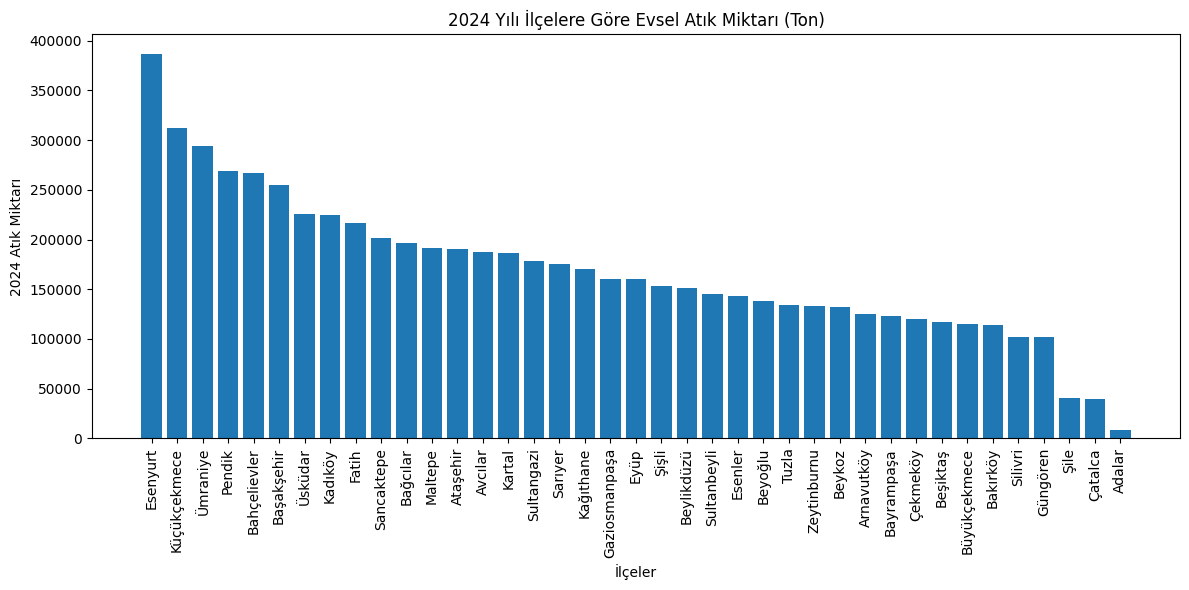

In [10]:
# 2024 yılına göre büyükten küçüğe sıralama
df_atik_2024_sorted = df_atik.sort_values("2024", ascending=False)

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.bar(df_atik_2024_sorted["Ilce"], df_atik_2024_sorted["2024"])
plt.xticks(rotation=90)
plt.title("2024 Yılı İlçelere Göre Evsel Atık Miktarı (Ton)")
plt.xlabel("İlçeler")
plt.ylabel("2024 Atık Miktarı")
plt.tight_layout()
plt.show()


### 2024 Yılı İlçelere Göre Evsel Atık Miktarları

Bu grafikte, İstanbul’daki tüm ilçelerin 2024 yılına ait evsel atık üretim miktarları karşılaştırılmıştır.

- **Esenyurt**, **Küçükçekmece**, **Ümraniye** ve **Pendik**, 2024 yılında en fazla atık üreten ilçeler arasında yer almaktadır.  
Bu ilçelerdeki yüksek nüfus yoğunluğu, konutlaşma ve ticaret hacmi bu durumu açıklayan temel etkenler olabilir.

- **Adalar**, **Çatalca**, **Şile** ve **Güngören** gibi ilçeler ise en düşük atık miktarına sahip bölgeler olarak öne çıkmaktadır.  
Bu ilçelerde nüfusun az olması, kırsal yapıların baskınlığı veya geçici nüfus etkisinin daha düşük olması bu durumu etkileyebilir.

In [11]:
# Sınıflandırma 
def siniflandir(miktar):
    if miktar > 250000:
        return "Yüksek Üretici"
    elif miktar > 125000:
        return "Orta Üretici"
    else:
        return "Düşük Üretici"

# Yeni sütun ekle
df_atik["Atik_Sinifi"] = df_atik["2024"].apply(siniflandir)

# Her sınıftaki ilçe sayısını göster
print(df_atik["Atik_Sinifi"].value_counts())

Atik_Sinifi
Orta Üretici      23
Düşük Üretici     10
Yüksek Üretici     6
Name: count, dtype: int64


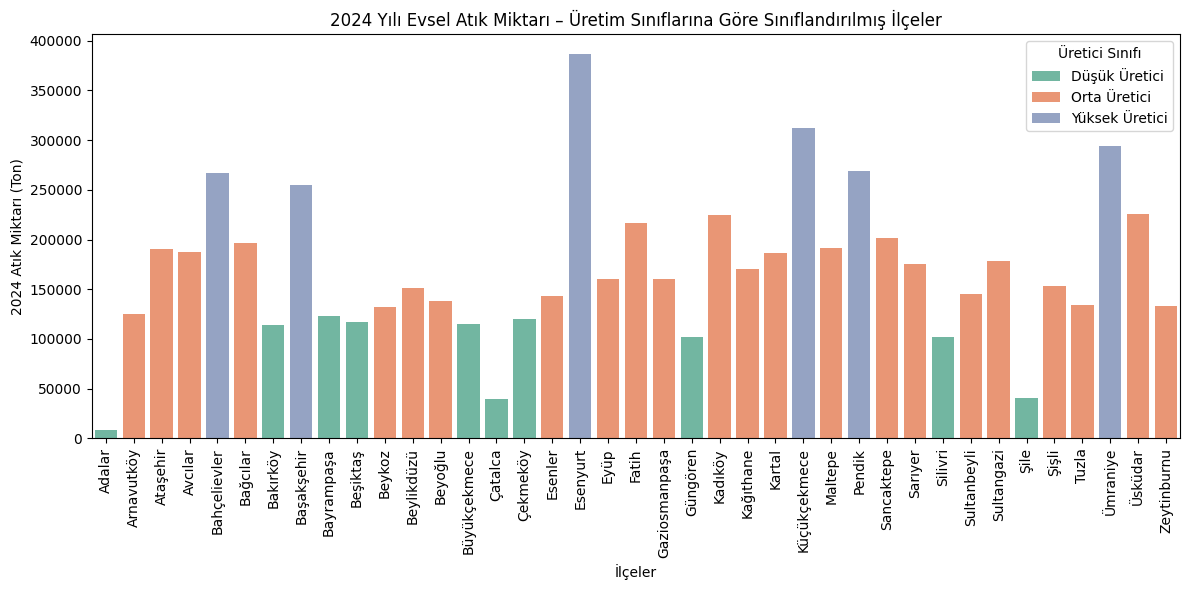

In [12]:
# Grafik çiz
plt.figure(figsize=(12, 6))
sns.barplot(x="Ilce", y="2024", hue="Atik_Sinifi", data=df_atik, palette="Set2")
plt.title("2024 Yılı Evsel Atık Miktarı – Üretim Sınıflarına Göre Sınıflandırılmış İlçeler")
plt.xlabel("İlçeler")
plt.ylabel("2024 Atık Miktarı (Ton)")
plt.xticks(rotation=90)
plt.legend(title="Üretici Sınıfı")
plt.tight_layout()
plt.show()

### 2024 Yılı Evsel Atık Miktarı – Üretim Sınıflarına Göre İlçe Sınıflandırması

Bu grafikte, İstanbul’daki ilçeler 2024 yılına ait evsel atık üretim miktarlarına göre üç sınıfa ayrılmıştır:

- **Yüksek Üretici** ilçeler (örneğin **Esenyurt**, **Küçükçekmece**, **Ümraniye**) yılda 250.000 tonun üzerinde evsel atık üretmektedir.  

- **Orta Üretici** sınıfında 23 ilçe yer almaktadır. Bu ilçelerde düzenli hizmet yeterli olabilir ancak artış potansiyeli izlenmelidir.

- **Düşük Üretici** ilçeler ise görece daha az nüfusa veya dağınık yerleşime sahiptir. (**Adalar**, **Şile**, **Çatalca** vb.)  
Bu ilçelerde temizlik stratejileri farklılaştırılabilir, örneğin mobil ekiplerle daha verimli hizmet sağlanabilir.

Bu sınıflandırma, belediyelere **kaynak tahsisi** ve **hizmet önceliklendirme** açısından doğrudan rehberlik etmektedir.


**BAYRAMPAŞA ÖZELİNDE ANALİZ**

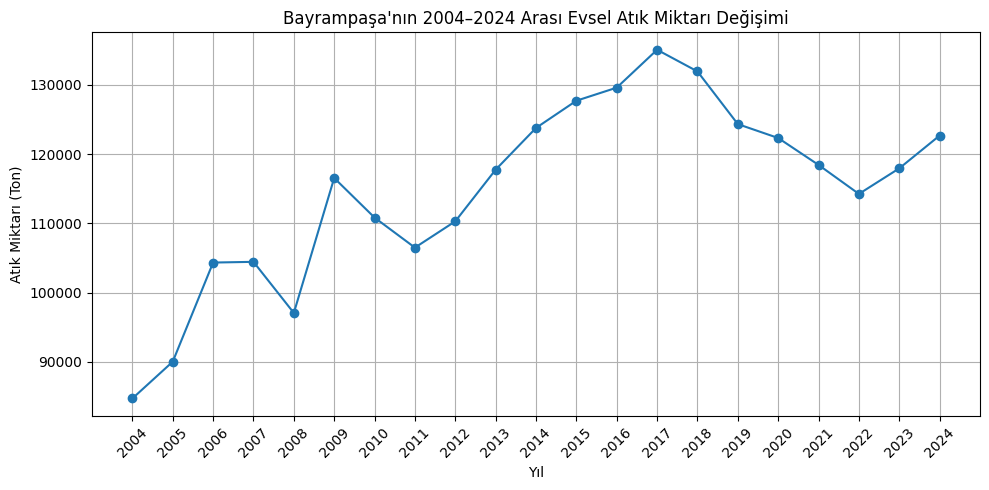

In [13]:
# Bayrampaşa'nın yıllar içindeki verisini al
bayrampasa = df_atik[df_atik["Ilce"] == "Bayrampaşa"].T
bayrampasa.columns = ["Bayrampaşa"]
bayrampasa = bayrampasa.drop(["Ilce", "Toplam_Atik", "Atik_Sinifi"], errors="ignore")

# Grafikle göster

plt.figure(figsize=(10, 5))
plt.plot(bayrampasa.index, bayrampasa["Bayrampaşa"], marker='o')
plt.title("Bayrampaşa'nın 2004–2024 Arası Evsel Atık Miktarı Değişimi")
plt.xlabel("Yıl")
plt.ylabel("Atık Miktarı (Ton)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Bayrampaşa Özelinde Evsel Atık Miktarı Analizi (2004–2024)

Bu grafikte, Bayrampaşa ilçesinin 2004 ile 2024 yılları arasındaki evsel atık miktarındaki değişim gösterilmektedir.

🔸 Bayrampaşa, 2024 yılı itibarıyla **“Orta Üretici”** sınıfında yer almaktadır.  
🔸 Yüzdelik artış açısından incelendiğinde, 20 yılda yaklaşık **%45 artış** göstermiştir.

Bu veriler ışığında Bayrampaşa’da:
- Atık yönetimi konusunda **istikrarlı ancak dalgalı bir eğilim** olduğu,
- Vatandaş bilgilendirme ve farkındalık kampanyaları, teknoloji temelli çözümler ve rota planlaması gibi yaklaşımlarla  
temizlik hizmetlerinin daha da verimli hale getirilebileceği değerlendirilmektedir.


## 2-NÜFUS YOĞUNLUĞU VERİ ANALİZİ


Bu bölümde, İstanbul’un ilçelere göre yıllık nüfus değişimleri analiz edilmiştir.
Amaç; ilçelerin demografik yükünü belirleyerek kişi başına düşen atık miktarının yorumlanabilmesini sağlamaktır.
Nüfus verileri, Türkiye İstatistik Kurumu (TÜİK) tarafından yayınlanan Adrese Dayalı Nüfus Kayıt Sistemi (ADNKS) sonuçlarından alınmıştır.

In [14]:
df_nufus = pd.read_excel("nufus.xlsx")

In [15]:
df_nufus.head()

,Unnamed: 0,Unnamed: 1,Sütunlar
0,Satırlar,NaN,"İbbs-Düzey1, İbbs-Düzey2, İl Ve İlçe Nüfusları"
1,NaN,NaN,Ölçüm bazında
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,2007,İstanbul(Adalar)-1103,10460


In [16]:
df_nufus.shape

(699, 3)

In [17]:
# Eksik veri kontrolü
df_nufus.isna().sum()

Unnamed: 0    680
Unnamed: 1      4
Sütunlar        2
dtype: int64

In [18]:
# Eksik verilerin toplam sayısı
df_nufus.isna().sum().sum() 

np.int64(686)

In [19]:
print(df_nufus.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Sütunlar'], dtype='object')


In [20]:
# İlk 4 satırı at
df_nufus = df_nufus.iloc[4:].copy()

# Yıl bilgilerini doldur
df_nufus['Yıl'] = df_nufus['Unnamed: 0'].ffill()

# Boş ilçe isimlerini ele
df_nufus = df_nufus[df_nufus['Unnamed: 1'].notna()].copy()

# İlçe adlarını ayıkla
df_nufus[['İlçe', 'Kod']] = df_nufus['Unnamed: 1'].str.extract(r'İstanbul\((.*?)\)-(\d+)')

# Nüfus sayısını dönüştür
df_nufus['Nüfus'] = pd.to_numeric(df_nufus['Sütunlar'], errors='coerce')

# Yılı tam sayıya çevir
df_nufus['Yıl'] = df_nufus['Yıl'].astype(int)

# Sadece gerekli sütunları al
df_nufus = df_nufus[['Yıl', 'İlçe', 'Nüfus']].reset_index(drop=True)


In [21]:
df_nufus.head()

,Yıl,İlçe,Nüfus
0,2007,Adalar,10460
1,2007,Avcılar,323596
2,2007,Bağcılar,719267
3,2007,Bahçelievler,571711
4,2007,Bakırköy,214821


In [22]:
print(df_nufus['Yıl'].unique())


[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]


In [23]:
# Eksik verilerin toplam sayısı
df_nufus.isna().sum().sum() 

np.int64(0)

<Axes: title={'center': '2007–2024 İstanbul Toplam Nüfusu'}, xlabel='Yıl'>

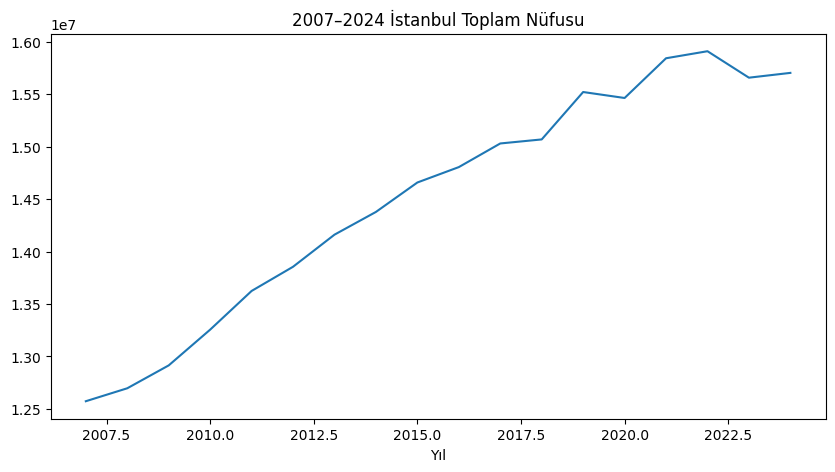

In [24]:
# Yıllara göre toplam İstanbul nüfusu
istanbul_genel = df_nufus.groupby('Yıl')['Nüfus'].sum()
istanbul_genel.plot(title='2007–2024 İstanbul Toplam Nüfusu', figsize=(10,5))

### 2007–2024 İstanbul Toplam Nüfusu
Bu grafik, 2007 ile 2024 yılları arasında İstanbul’un toplam nüfusundaki değişimi göstermektedir.

- Genel eğilim artış yönündedir.
- Artan nüfus, atık yönetimi açısından belediyelerin üzerindeki yükü artırmaktadır.  
- Bu grafik, kişi başına düşen atık miktarını değerlendirirken temel referans niteliğindedir.


## 3- ATIK VE NÜFUS VERİLERİNİN EŞLEŞTİRİLMESİ

Bu bölümde, İstanbul’un ilçelerine ait **yıllık nüfus verileri** ile **evsel atık miktarları** birleştirilmiştir.  
Amaç, **kişi başına düşen atık miktarını** hesaplayarak, çevre hizmetlerinin etkinliği ve nüfus baskısı açısından ilçeleri karşılaştırmaktır.

### Veri kaynakları:
- **Nüfus verisi**: TÜİK Adrese Dayalı Nüfus Kayıt Sistemi (2007–2024)
- **Atık verisi**: İBB Açık Veri Portalı – İlçe Bazında Yıllık Evsel Atık Miktarları (2004–2024)

In [25]:
# 1. Yalnızca yıl olan sütunları al (2004–2024)
yil_sutunlari = [col for col in df_atik.columns if col.isdigit()]

# 2. Melt işlemi: geniş --> uzun format
df_atik_long = df_atik.melt(
    id_vars=["Ilce"], 
    value_vars=yil_sutunlari, 
    var_name="Yıl", 
    value_name="AtıkMiktarı"
)

# 3. Yıl ve Atık miktarı sayı türüne çevrilir
df_atik_long["Yıl"] = df_atik_long["Yıl"].astype(int)
df_atik_long["AtıkMiktarı"] = pd.to_numeric(df_atik_long["AtıkMiktarı"], errors="coerce")

# 4. İlçe adını diğer df ile eşleşecek şekilde yeniden adlandır
df_atik_long = df_atik_long.rename(columns={"Ilce": "İlçe"})


In [26]:
df_atik_long.head()

,İlçe,Yıl,AtıkMiktarı
0,Adalar,2004,7834.0
1,Arnavutköy,2004,14742.0
2,Ataşehir,2004,99570.0
3,Avcılar,2004,76741.0
4,Bahçelievler,2004,165395.0


In [27]:
# Ortak yıllar ve ilçelere göre inner merge
df_birlesik = pd.merge(df_atik_long, df_nufus, on=["Yıl", "İlçe"], how="inner")

# Kişi başına düşen atık miktarını hesapla
df_birlesik["KisiBasiAtik"] = df_birlesik["AtıkMiktarı"] / df_birlesik["Nüfus"]

In [28]:
df_birlesik.head()

,İlçe,Yıl,AtıkMiktarı,Nüfus,KisiBasiAtik
0,Adalar,2007,12102.0,10460,1.156979
1,Avcılar,2007,113784.0,323596,0.351624
2,Bahçelievler,2007,198891.0,571711,0.347887
3,Bağcılar,2007,249504.0,719267,0.346886
4,Bakırköy,2007,102793.0,214821,0.478505


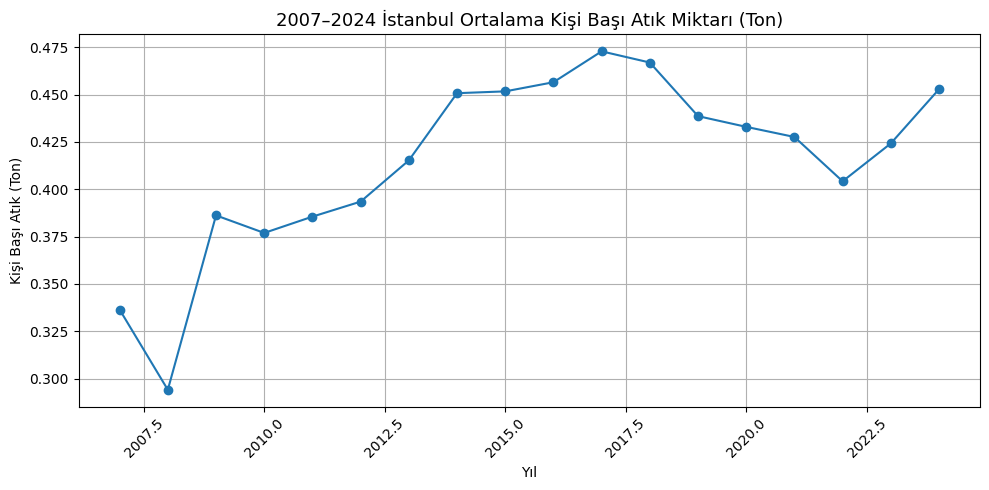

In [29]:
# Yıla göre ortalama kişi başı atık hesapla
df_yillik_ortalama = df_birlesik.groupby("Yıl")["KisiBasiAtik"].mean().reset_index()

# Çizgi grafik
plt.figure(figsize=(10, 5))
plt.plot(df_yillik_ortalama["Yıl"], df_yillik_ortalama["KisiBasiAtik"], marker='o')
plt.title("2007–2024 İstanbul Ortalama Kişi Başı Atık Miktarı (Ton)", fontsize=13)
plt.xlabel("Yıl")
plt.ylabel("Kişi Başı Atık (Ton)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Tüm satırları göster
pd.set_option('display.max_rows', None)

print(df_yillik_ortalama)

     Yıl  KisiBasiAtik
0   2007      0.336469
1   2008      0.294130
2   2009      0.386225
3   2010      0.376949
4   2011      0.385562
5   2012      0.393491
6   2013      0.415256
7   2014      0.450751
8   2015      0.451713
9   2016      0.456534
10  2017      0.472855
11  2018      0.466940
12  2019      0.438637
13  2020      0.432975
14  2021      0.427633
15  2022      0.404233
16  2023      0.424232
17  2024      0.452860


### 2007–2024 İstanbul Ortalama Kişi Başı Atık Miktarı (Ton)
Bu grafik, İstanbul genelinde kişi başına düşen yıllık ortalama atık miktarının yıllara göre değişimini göstermektedir.

- 2013–2017 yılları arasında kişi başı atık miktarında istikrarlı bir artış yaşanmış, bu dönemde zirveye ulaşılmıştır.
- 2018 sonrası dönemde düşüş eğilimi gözlenmiş, bu durum pandemi sonrası davranış değişiklikleri, ekonomik koşullar veya geri dönüşüm uygulamalarının etkisiyle açıklanabilir.
- 2022 yılında son yılların en düşük seviyelerden biri kaydedilmiş, ardından 2023 ve 2024'te **yeniden artış eğilimi** başlamıştır.

Bu dalgalanmalar, bireysel tüketim alışkanlıklarının ve atık yönetimi politikalarının zaman içindeki etkilerini yansıtmaktadır.

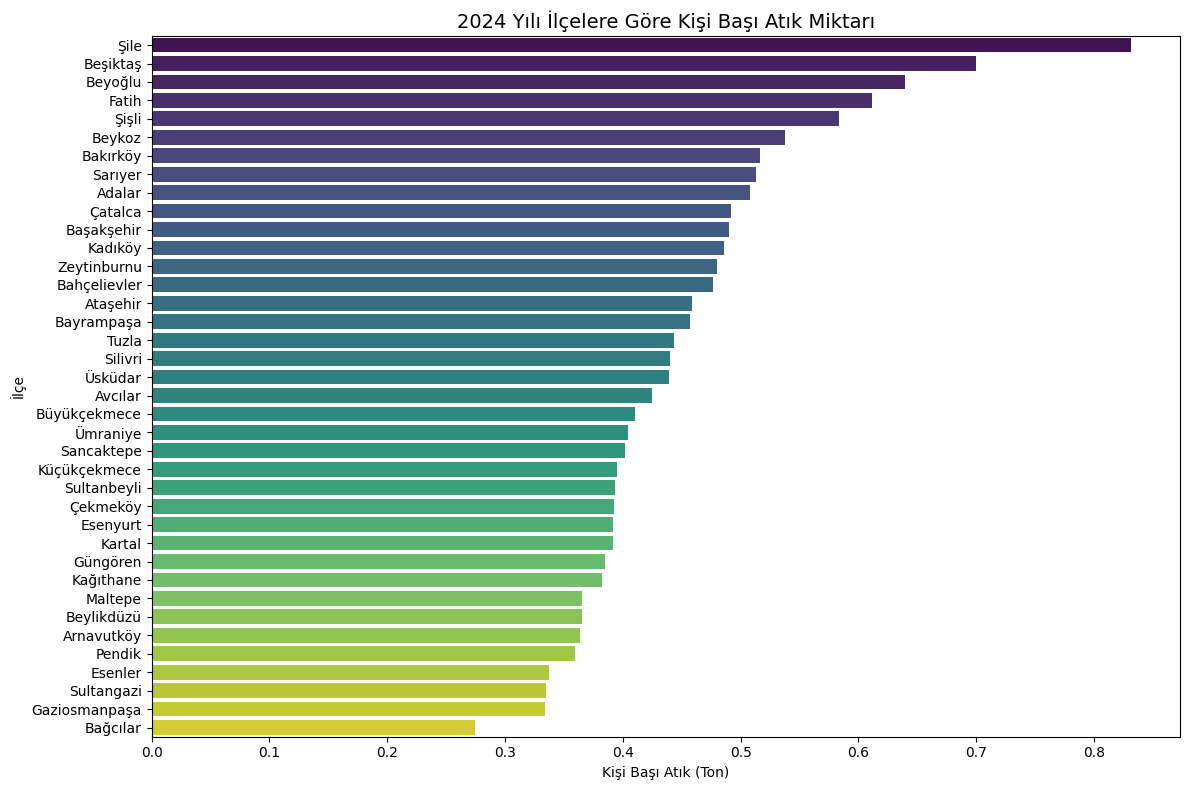

In [31]:
# 2024 yılına ait veriyi filtrele
df_2024 = df_birlesik[df_birlesik["Yıl"] == 2024].copy()

# Kişi başı atık miktarına göre büyükten küçüğe sırala
df_2024_sorted = df_2024.sort_values("KisiBasiAtik", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_2024_sorted, y="İlçe", x="KisiBasiAtik", hue="İlçe", dodge=False, legend=False, palette="viridis")
plt.title("2024 Yılı İlçelere Göre Kişi Başı Atık Miktarı", fontsize=14)
plt.xlabel("Kişi Başı Atık (Ton)")
plt.ylabel("İlçe")
plt.tight_layout()
plt.show()

### 2024 Yılı İlçelere Göre Kişi Başı Atık Miktarı

Bu grafik, **2024 yılı itibarıyla İstanbul’daki her ilçede bir kişinin ortalama ne kadar evsel atık ürettiğini** göstermektedir.  
İlçeler, kişi başı atık miktarına göre büyükten küçüğe sıralanmıştır.

#### Öne Çıkan Gözlemler

- **Şile**, 2024 yılında kişi başı atık üretiminde **ilk sırada yer almaktadır**.  
  Bu durum, ilçedeki yazlık nüfus, ikinci konutlar ve günübirlik turizm hareketliliğiyle ilişkilidir.  
  Resmi nüfus düşük olmasına rağmen sezonluk kullanımın yoğunluğu, **kişi başına düşen atık miktarını yukarı çekmektedir.**

- **Beşiktaş, Beyoğlu, Fatih ve Şişli** gibi merkezi ve ticari yoğunluğu yüksek ilçeler de üst sıralarda yer almaktadır.  
  Bu bölgelerde yaşayan kişi sayısı düşük olsa da; ofis, kafe, restoran gibi işletmeler ve gündüz nüfusundaki artış, kişi başına düşen atığı artırmaktadır.

- **Adalar** da yine yüksek kişi başı atık oranıyla dikkat çeken ilçelerden biridir.  
  Turistik dönemlerde konaklayan ziyaretçiler, resmi nüfusla karşılaştırıldığında **orantısız atık yükü** oluşturabilir.

- Öte yandan, **Bağcılar, Gaziosmanpaşa, Sultangazi ve Esenler** gibi kalabalık yerleşim bölgelerinde kişi başı atık miktarı oldukça düşüktür.  
  Bu, **daha kalabalık aile yapısı** ve **ekonomik tüketim alışkanlıkları** gibi sosyoekonomik faktörlerle açıklanabilir.

#### Sonuç

Bu analiz, atık üretiminin sadece toplam nüfusla değil, **yaşam tarzı, ticari yoğunluk ve mevsimsel hareketlilikle** yakından ilişkili olduğunu göstermektedir.  
Yerel yönetimlerin atık yönetimi politikalarını sadece nüfus sayısına göre değil, **kişi başına düşen atık üretim eğilimlerine göre** şekillendirmesi kritik önem taşımaktadır.

In [32]:
# Pivot tablo: İlçeler satırda, yıllar sütunda
heatmap_data = df_birlesik.pivot_table(
    index="İlçe", 
    columns="Yıl", 
    values="KisiBasiAtik"
)

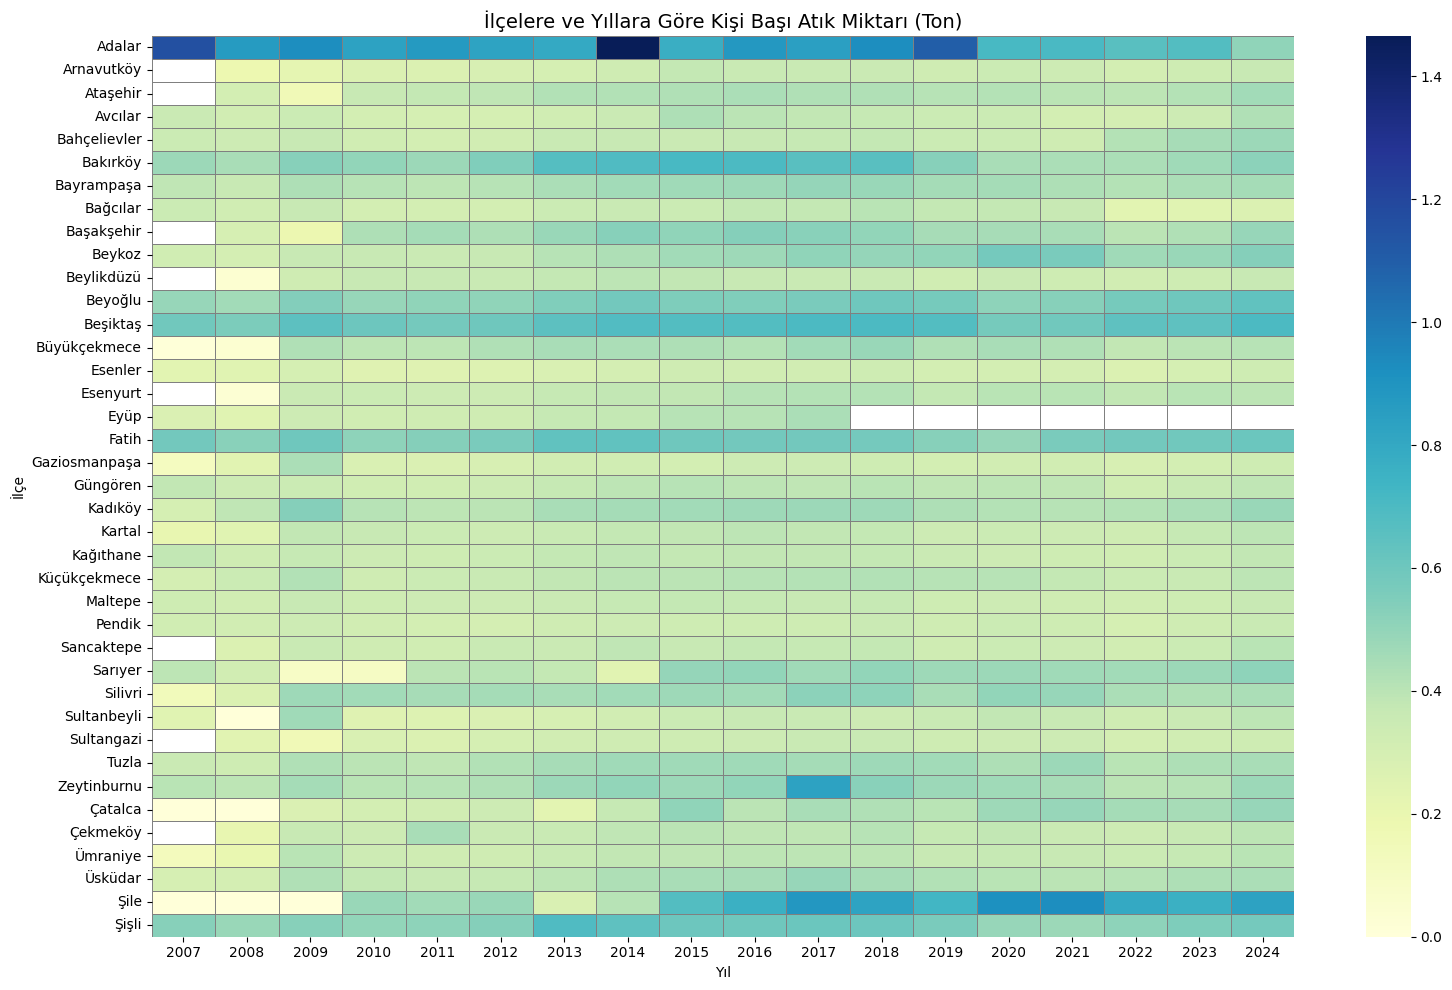

In [33]:
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("İlçelere ve Yıllara Göre Kişi Başı Atık Miktarı (Ton)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("İlçe")
plt.tight_layout()
plt.show()

### İlçelere ve Yıllara Göre Kişi Başı Atık Miktarı (Heatmap)

Bu heatmap, İstanbul’daki ilçelerde **kişi başına düşen yıllık evsel atık miktarının 2007–2024 yılları arasındaki** değişimini göstermektedir. Grafik, **zamana (yıl)** ve **mekâna (ilçe)** bağlı farklılıkları görselleştirerek, atık yönetimi açısından kritik öneme sahip örüntüleri ortaya koymaktadır.

#### Öne Çıkan Gözlemler:

- **Şile** ilçesi son yıllarda (özellikle 2020–2024 arası) **İstanbul’da kişi başına düşen atık miktarının en yüksek olduğu bölge** haline gelmiştir.  
  Bu durum, yazlık kullanımı, ikinci konutlar ve günübirlik turizm gibi faktörlerle açıklanabilir.  
  **Nüfusun düşük ama atık üretiminin mevsimsel olarak yüksek olması**, bu oranı şişirmektedir.

- **Beşiktaş, Şişli ve Beyoğlu** gibi merkez ilçelerde kişi başı atık oranı **her yıl yüksek seyretmektedir.**  
  Bu durum, bu bölgelerin gündüz nüfusunun çok yüksek olması, restoran ve ofis yoğunluğu, tek kullanımlık ürün tüketimi gibi etkenlerle ilişkilidir.

- **Adalar** ilçesi geçmişte (2007–2015) en yüksek değerlere sahipken, son yıllarda nispeten daha düşük seviyelere gerilemiştir.  
  2014’te gözlemlenen dramatik artış, muhtemelen turistik yoğunluğun zirve yaptığı döneme denk gelmektedir.

- **Bağcılar, Esenyurt, Gaziosmanpaşa** gibi yoğun nüfuslu ilçeler heatmap'te açık renk tonlarıyla öne çıkar.  
  Bu da kişi başı atık üretiminin düşük olduğunu gösterir.  
  **Kalabalık hane yapısı**, daha **ekonomik tüketim** alışkanlıkları ve **hizmet yoğunluğu farkı** bu tabloyu açıklayabilir.

- **2020 ve 2021 yıllarında** birçok ilçede renklerin açıldığı (yani kişi başı atığın azaldığı) görülmektedir.  
  Bu dönem, **pandemi etkisiyle evde kalma, tüketim düşüşü ve turistik hareketliliğin azalmasıyla** ilişkilendirilebilir.

#### Sonuç

Bu grafik, İstanbul’da atık üretim davranışlarının **sabit bir düzlemde değil**, ilçeye, mevsime, sosyal yapıya ve yıllık olaylara göre değiştiğini gösterir.  
Veriye dayalı bu bakış açısı sayesinde yerel yönetimler:

- **Şile gibi düşük nüfuslu ama yüksek üretimli ilçelere özel çözümler**,   
- **Kampanyaların yoğunlaştırılması gereken semtler**,  
gibi somut ve hedeflenmiş çevre politikaları geliştirebilir.



In [34]:
# İlçelere göre 2007 ve 2024 kişi başı atık değerlerini al
ilk_yil = df_birlesik[df_birlesik["Yıl"] == 2007]
son_yil = df_birlesik[df_birlesik["Yıl"] == 2024]

# Ortalama değerleri al
df_avg = df_birlesik.groupby("İlçe")["KisiBasiAtik"].mean().reset_index(name="OrtalamaAtik")

# 2007 ve 2024 değerlerini merge et
df_artis = pd.merge(ilk_yil[["İlçe", "KisiBasiAtik"]], son_yil[["İlçe", "KisiBasiAtik"]], on="İlçe", suffixes=("_2007", "_2024"))

# Yüzdelik artış hesapla
df_artis["ArtisOrani"] = (df_artis["KisiBasiAtik_2024"] - df_artis["KisiBasiAtik_2007"]) / df_artis["KisiBasiAtik_2007"]

# Ortalama kişi başı atıkla birleştir
df_scatter = pd.merge(df_avg, df_artis[["İlçe", "ArtisOrani"]], on="İlçe")


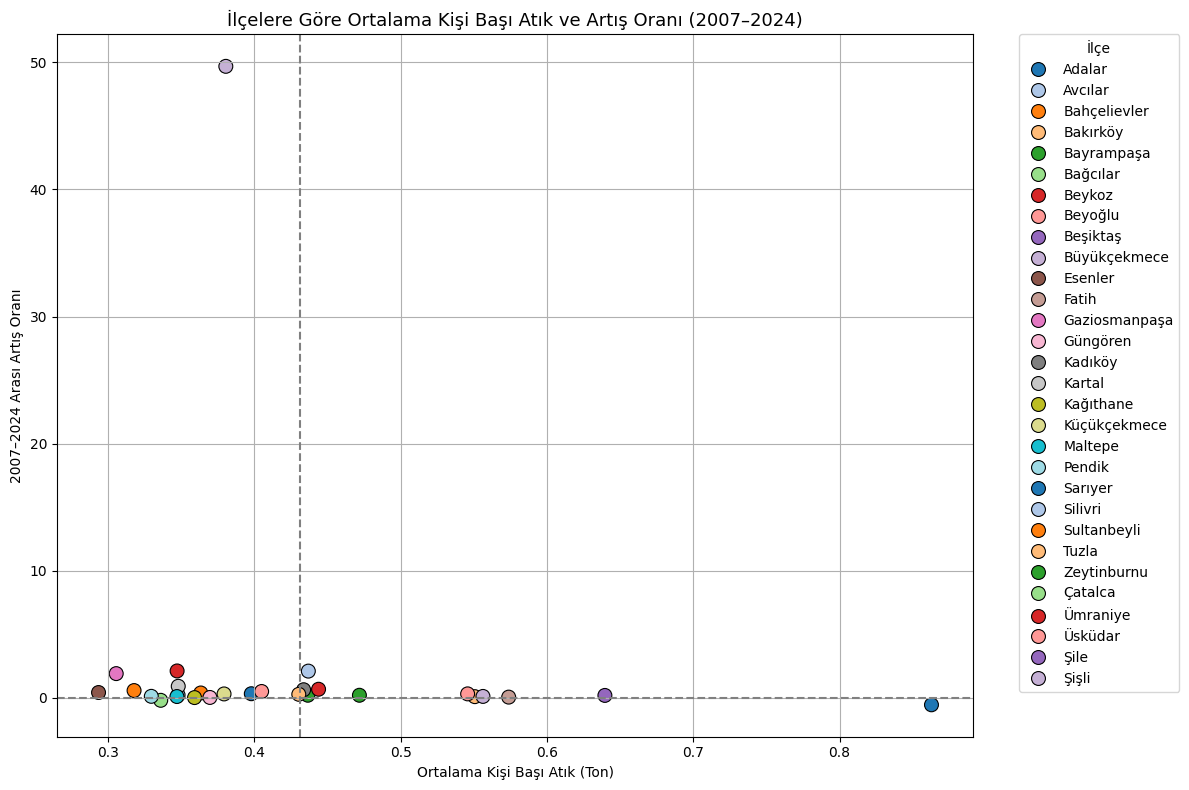

In [35]:
plt.figure(figsize=(12, 8))

# Her ilçe için farklı renk ve legend kutucuğu
sns.scatterplot(
    data=df_scatter,
    x="OrtalamaAtik",
    y="ArtisOrani",
    hue="İlçe",       # her ilçeye ayrı renk
    s=100,
    palette="tab20",  # 20 farklı renkli palet
    edgecolor='black'
)

# Yardımcı çizgiler
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(df_scatter["OrtalamaAtik"].mean(), color='gray', linestyle='--')

# Başlık ve eksen adları
plt.title("İlçelere Göre Ortalama Kişi Başı Atık ve Artış Oranı (2007–2024)", fontsize=13)
plt.xlabel("Ortalama Kişi Başı Atık (Ton)")
plt.ylabel("2007–2024 Arası Artış Oranı")

# Legend düzeni
plt.legend(title="İlçe", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.grid(True)
plt.tight_layout()
plt.show()

### İlçelere Göre Ortalama Kişi Başı Atık ve Artış Oranı (2007–2024)

Bu grafik, İstanbul’daki ilçelerin 2007–2024 yılları arasındaki:

- **Ortalama kişi başına düşen yıllık atık miktarını** (yatay eksen),
- **Bu miktarın zaman içindeki yüzde değişimini**, yani **artış oranını** (dikey eksen),
aynı anda göstermektedir.


#### Grafik Nasıl Okunmalı?

- Her nokta bir ilçeyi temsil eder.
- Sağdaki renk kutucukları sayesinde her noktanın hangi ilçeye ait olduğu anlaşılır.
- **Dikey kesikli çizgi**, tüm ilçelerin ortalama kişi başı atık değerini temsil eder.
- **Yatay kesikli çizgi**, artış oranı sıfır olan (yani değişmeyen) noktayı gösterir.

#### Öne Çıkan Yorumlar

- **Sağ üst köşe**: Hem kişi başı atık üretimi yüksek hem de artış oranı yüksek ilçeler.  
  ➤ Bu bölgeler **çevresel baskının en yoğun olduğu yerlerdir** ve **öncelikli müdahale** gerektirir.

- **Sol üst köşe**: Şu anda düşük atık üretse de hızlı artış gösteren ilçeler.  
  ➤ **Gizli risk bölgeleri** olabilir, **erken önlem** alınmalıdır.

- **Sağ alt köşe**: Atık üretimi yüksek ama zamanla azalmış ilçeler.  
  ➤ Bu durum **etkili politikaların sonucu** olabilir.

- **Sol alt köşe**: Düşük üretim ve düşük artış oranı.  
  ➤ Bu bölgeler **istikrarlı ve kontrol altında** olarak değerlendirilebilir.

  
#### Sonuç

Bu grafik, sadece bugünkü durumu değil, **zaman içindeki eğilimleri** de görmemizi sağlar.  
**Belediyeler için kaynak ve hizmet planlamasında çok boyutlu karar desteği sunar.**  
Özellikle artış oranı yüksek olan bölgeler için **erken uyarı ve öncelikli müdahale** imkânı sağlar.



D:\atik_analizi\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


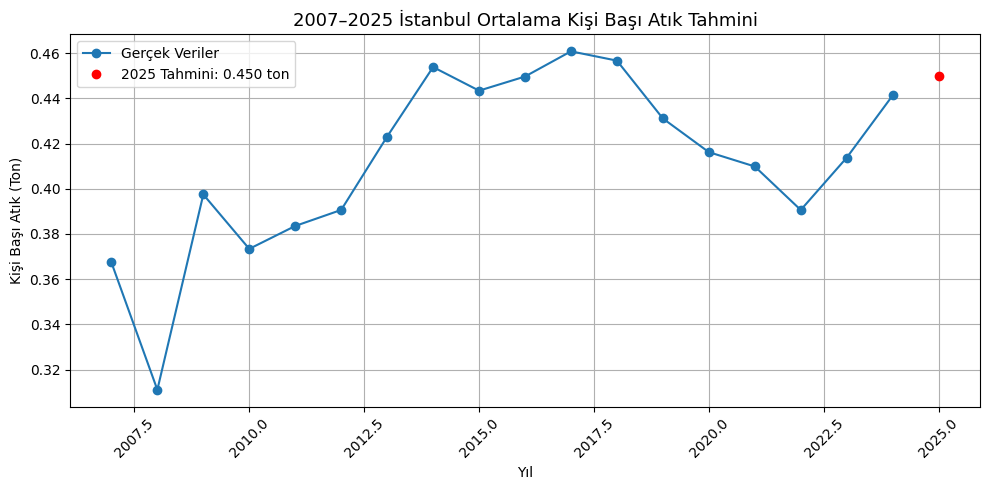

In [36]:
from sklearn.linear_model import LinearRegression

# Gerçek ortalama kişi başı atık verileri
yillar = list(range(2007, 2025))
kisi_basi_atik = [
    0.367434, 0.311078, 0.397470, 0.373409, 0.383538, 0.390631, 0.423072, 0.453824,
    0.443390, 0.449644, 0.460789, 0.456671, 0.431085, 0.416195, 0.409851, 0.390612,
    0.413754, 0.441291
]

df = pd.DataFrame({
    "Yıl": yillar,
    "KisiBasiAtik": kisi_basi_atik
})

# Modelleme
X = df[["Yıl"]]
y = df["KisiBasiAtik"]
model = LinearRegression()
model.fit(X, y)

# 2025 tahmini
tahmin_2025 = model.predict([[2025]])

plt.figure(figsize=(10, 5))
plt.plot(df["Yıl"], df["KisiBasiAtik"], marker='o', label="Gerçek Veriler")
plt.plot(2025, tahmin_2025[0], 'ro', label=f"2025 Tahmini: {tahmin_2025[0]:.3f} ton")
plt.title("2007–2025 İstanbul Ortalama Kişi Başı Atık Tahmini", fontsize=13)
plt.xlabel("Yıl")
plt.ylabel("Kişi Başı Atık (Ton)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔮 2025 Tahmini:
> İstanbul’da kişi başına düşen ortalama atık miktarının **2025 yılında yaklaşık 0.450 ton** olacağı öngörülmektedir.

Bu tahmin, geçmiş verilerdeki artış ve azalış eğilimleri dikkate alınarak yapılmıştır. Özellikle pandemi sonrası toparlanma eğilimi, 2025'te yeniden artış yaşanabileceğini göstermektedir.

Bu tahmin, temizlik hizmetleri ve kaynak planlamasının veri temelli şekilde yapılabilmesine olanak sağlar.

## 🚀 Geliştirilebilirlik ve Öneriler

Bu analiz, İstanbul’daki atık üretimi ve nüfus dinamikleri üzerine veri temelli bulgular sunmaktadır. Ancak bu veriler, belediye hizmetlerinin geliştirilmesi adına daha ileri çözümlerle birleştirilebilir:
- 🤳 **Yapay Zeka Destekli Çöp Tespiti ve Müdahale Sistemi**: Kaldırımlara bırakılan ve sıklıkla şikâyet konusu olan çöplerin daha hızlı ve doğru şekilde tespit edilmesi için, vatandaşların çöp fotoğraflarını yükleyebileceği bir mobil uygulama geliştirilebilir. Uygulamada, yüklenen görseller yapay zeka ile analiz edilir ve gerçekten çöp içerdiği tespit edilen durumlarda ilgili temizlik ekiplerine otomatik bildirim gönderilir. Elde edilen yoğunluk verilerine göre temizlik araçlarının güzergâhları gerçek zamanlı olarak güncellenebilir.
- 📱 **Mobil Bildirim Sistemi**: Atık üretimi yüksek ilçelerde, vatandaşlara çöp çıkarma saatleri, geri dönüşüm günleri ve temizlik zamanı gibi konularda bildirim gönderilebilir.
- 🛻 **Akıllı Rota Planlama**: Toplanan veriler, temizlik araçları için rota optimizasyonu sağlayarak zaman ve kaynak israfını azaltabilir.
- 📊 **Tahmine Dayalı Modelleme**: Gelecekteki atık üretimi tahmin edilerek temizlik ekipmanları ve personel dağılımı önceden planlanabilir.
- 🌱 **Farkındalık Kampanyaları**: Kişi başına düşen atığın yüksek olduğu bölgelerde bilinçlendirme çalışmaları yapılabilir.
- 🔄 **Geri Dönüşüm Politikaları**: Bazı ilçelerde geri dönüşüm oranı düşük olabilir. Bu bölgelerde pilot uygulamalarla dönüşüm teşvik edilebilir.

Bu öneriler, mevcut verinin sosyal faydaya dönüşmesini sağlayacak adımlar olabilir.


## Sonuç

Bu proje, İstanbul’daki evsel atık üretiminin zamana ve mekâna göre analiz edilerek, kişi başı atık miktarı gibi anlamlı göstergelerle zenginleştirilmesini sağlamıştır. 

Elde edilen bulgular:
- Nüfusa oranla aşırı atık üreten bölgeleri,
- Yıllar içinde dramatik artış gösteren ilçeleri,
- İleriye dönük tahminle hizmet ihtiyacını önceden görebilmeyi sağlamaktadır.

Veri tabanlı bu yaklaşım, belediyelerin daha **verimli, adil ve sürdürülebilir temizlik politikaları** oluşturmasına doğrudan katkı sunabilir. 

## Topluma Yönelik Sonuçlar

Bu analiz yalnızca belediyeler için değil, vatandaşlar için de önemli mesajlar içermektedir:

##### Kişisel Atık Bilinci
Bazı ilçelerde kişi başına düşen atık miktarı oldukça yüksek. Tüketim alışkanlıklarımızı gözden geçirmek, gereksiz ambalajlardan kaçınmak önemli bir adım olabilir.

##### Farkındalık ve Eğitim
Yüksek atık üreten ilçelerde, okullarda ve dijital mecralarda bilinçlendirme kampanyaları yapılabilir.  

##### Geri Dönüşüm ve Tüketim
Vatandaşlar geri dönüşüm kutularını doğru kullanarak, organik atıkları kompost yaparak evsel atığı azaltabilir.  
Tek kullanımlık ürünler yerine yeniden kullanılabilir ürünler tercih edilmeli.

##### Bildirim Katılımı
Mobil uygulamalarla dolu konteynerler, kaçak dökümler belediyeye bildirilebilir.  
Bu sayede hızlı müdahale ve vatandaş-belediye iş birliği sağlanır.

